In [1]:
import os
os.environ["PYCARET_CUSTOM_TAGS"] = "DISABLE_DASK"

import pandas as pd
import numpy as np
from pycaret.time_series import *

# ===============================
# 1. LOAD DATA
# ===============================
df = pd.read_csv("data/NO2_Kwanyar.csv")

# pastikan kolom nama waktu benar
df["time"] = pd.to_datetime(df["time"], errors="coerce")

# ===============================
# 2. CLEANING NO2
# ===============================
def clean_no2(x):
    if isinstance(x, str) and x.strip() == "--":
        return np.nan
    try:
        return float(x)
    except:
        return np.nan

df["NO2"] = df["NO2"].apply(clean_no2)

# hilangkan NaN
df = df.dropna(subset=["NO2"])

# ===============================
# 3. SIAPKAN TIME SERIES
# ===============================
df = df[["time", "NO2"]]
df = df.set_index("time")

# ubah jadi frekuensi harian
df = df.asfreq("D")

# interpolasi missing values
df["NO2"] = df["NO2"].interpolate()

print(df.head())
print(df.info())

# ===============================
# 4. PYCARET SETUP
# ===============================
s = setup(
    data=df,
    target="NO2",
    fh=7,
    session_id=42,
    fold_strategy="expanding"
)



                 NO2
time                
2022-10-22  0.000042
2022-10-23  0.000050
2022-10-24  0.000036
2022-10-25  0.000023
2022-10-26  0.000026
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2022-10-22 to 2025-10-17
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO2     1092 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB
None


,Description,Value
0,session_id,42
1,Target,NO2
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1092, 1)"
5,Transformed data shape,"(1092, 1)"
6,Transformed train set shape,"(1085, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [2]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [3]:
exp.setup(data=df, fh=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,NO2
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1092, 1)"
5,Transformed data shape,"(1092, 1)"
6,Transformed train set shape,"(1089, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [4]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1092.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,0.000025
3,Summary,Statistics,Transformed,Median,,0.000023
4,Summary,Statistics,Transformed,Standard Deviation,,0.000014
5,Summary,Statistics,Transformed,Variance,,0.0
6,Summary,Statistics,Transformed,Kurtosis,,3.270347
7,Summary,Statistics,Transformed,Skewness,,0.069876
8,Summary,Statistics,Transformed,# Distinct Values,,1092.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1849.361056


In [5]:
# Compare Model
best = compare_models()

exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6033,0.5849,0.0000,0.0000,1.4184,0.5360,-0.2256,0.3700
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7048,0.7018,0.0000,0.0000,1.9131,0.5773,-0.8762,0.6000
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7095,0.7064,0.0000,0.0000,1.8074,0.5915,-1.0897,0.5133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7143,0.6560,0.0000,0.0000,1.8711,0.5867,-0.6155,0.1733
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.7216,0.7034,0.0000,0.0000,1.9189,0.5917,-0.9108,0.3633
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7233,0.6548,0.0000,0.0000,1.9571,0.5886,-0.5825,0.3667
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7233,0.6548,0.0000,0.0000,1.9571,0.5886,-0.5825,0.3767
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7233,0.6548,0.0000,0.0000,1.9571,0.5886,-0.5825,0.3833
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7233,0.6548,0.0000,0.0000,1.9571,0.5886,-0.5825,1.5267
polytrend,Polynomial Trend Forecaster,0.7262,0.6499,0.0000,0.0000,1.9415,0.5948,-0.6107,0.9033


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.5028,0.4991,0.0000,0.0000,0.6350,0.3794,-1.8027,0.2933
naive,Naive Forecaster,0.5529,0.4718,0.0000,0.0000,0.8629,0.3980,-2.0077,0.0233
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.5678,0.5243,0.0000,0.0000,0.7599,0.4098,-2.1248,1.7567
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5702,0.5657,0.0000,0.0000,0.6857,0.4261,-2.6705,0.5067
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5794,0.5358,0.0000,0.0000,0.7027,0.4244,-2.3045,0.0833
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.5860,0.5334,0.0000,0.0000,0.7368,0.4267,-2.2652,0.3400
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.5860,0.5334,0.0000,0.0000,0.7368,0.4267,-2.2652,0.3000
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.5860,0.5334,0.0000,0.0000,0.7368,0.4267,-2.2652,0.3200
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.5860,0.5334,0.0000,0.0000,0.7368,0.4267,-2.2652,1.4500
polytrend,Polynomial Trend Forecaster,0.5896,0.5449,0.0000,0.0000,0.7002,0.4277,-2.5806,0.0133


BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [35, 34,
                                                                        33, 32,
                                                                        31, 30,
                                                                        29, 28,
                                                                        27, 26,
                                                                        25, 24,
                                                                        23, 22,
                                                                        21, 20,
                                                                        19, 18,
                                                                        17, 16,
                                                                        15, 14,
                                                                        13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, ...]},
                                                   n_jobs=1)],
                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                    sp=35, window_length=35)

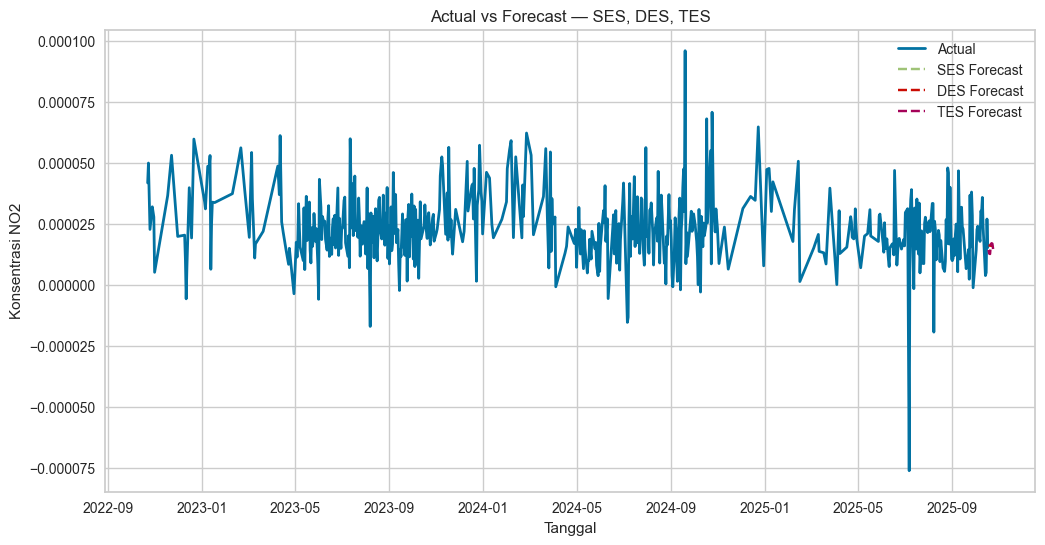

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Data time series
ts = df["NO2"]

# ======================
# 1. Single ES
# ======================
ses_model = SimpleExpSmoothing(ts).fit()
ses_pred = ses_model.forecast(7)

# ======================
# 2. Double ES (Holt)
# ======================
des_model = ExponentialSmoothing(ts, trend='add').fit()
des_pred = des_model.forecast(7)

# ======================
# 3. Triple ES (Holt-Winters)
# ======================
tes_model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=7).fit()
tes_pred = tes_model.forecast(7)

# ======================
# Plot
# ======================
plt.figure(figsize=(12,6))
plt.plot(ts, label="Actual", linewidth=2)

plt.plot(ses_pred, label="SES Forecast", linestyle='--')
plt.plot(des_pred, label="DES Forecast", linestyle='--')
plt.plot(tes_pred, label="TES Forecast", linestyle='--')

plt.title("Actual vs Forecast — SES, DES, TES")
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi NO2")
plt.legend()
plt.grid(True)
plt.show()
